In [144]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [145]:
R = 46.3 + 6.7
L = 10.6*1e-3
C = 49.1*1e-9

R_err = 0.2
L_err = 0.1*1e-3
C_err = 0.1*1e-9

omega_0 = (L*C)**(-1/2)
omega_0_err = (1/2)*(L*C)**(-3/2) *C*L_err + (1/2)*(L*C)**(-3/2)*L*C_err

gamma = R/L
gamma_err = R_err/L + R/(L**2) * L_err

omega = (omega_0**2 - gamma**2/4)**(1/2)
omega_err = (1/2) *(omega_0**2 - gamma**2/4)**(-1/2)*2*omega_0*omega_0_err + (1/2) *(omega_0**2 - gamma**2/4)**(-1/2)*(1/2)*gamma*gamma_err

print("Valores medidos: ")
print(f"R = {R} +- {R_err}")
print(f"L = {L} +- {L_err}")
print(f"C = {C} +- {C_err}")

print()
print("Valores Calculados: caso subcrítico")

print(f'omega = {omega} +- {omega_err}')
print(f'gamma = {gamma} +- {gamma_err}')


Valores medidos: 
R = 53.0 +- 0.2
L = 0.0106 +- 0.0001
C = 4.91e-08 +- 1.0000000000000002e-10

Valores Calculados: caso subcrítico
omega = 43762.16680202125 +- 253.6950099963905
gamma = 5000.0 +- 66.0377358490566


In [146]:
df = pd.read_csv('./dados/scope_1_2.csv', sep='\t')

x_data = df['second'].values
y_data = df['Volt'].values
x_data_err = df['unc_seconds'].values
y_data_err = df['unc_Volt'].values


In [147]:
def func(x_data, A, gamma, omega, phi):
    return A*np.exp(-gamma/2 *x_data) *np.sin(omega*x_data - phi)                                                                            

popt, pcov = curve_fit(func, x_data, y_data, p0 = [1, gamma, omega, 0])
A, gamma, omega, phi = popt 
A_err, gamma_err, omega_err, phi_err = np.sqrt(np.diag(pcov))
r2 = r2_score(y_data, func(x_data, *popt))

x_data_t = np.linspace(min(x_data), max(x_data), 2000)

print("Valores de ajuste")
print(f"gamma = {gamma/2} +- {gamma_err/2}")
print(f"omega = {omega} +- {omega_err}")

Valores de ajuste
gamma = 5294.003341318912 +- 24.194941958208773
omega = 45377.361738408115 +- 23.687677174618425


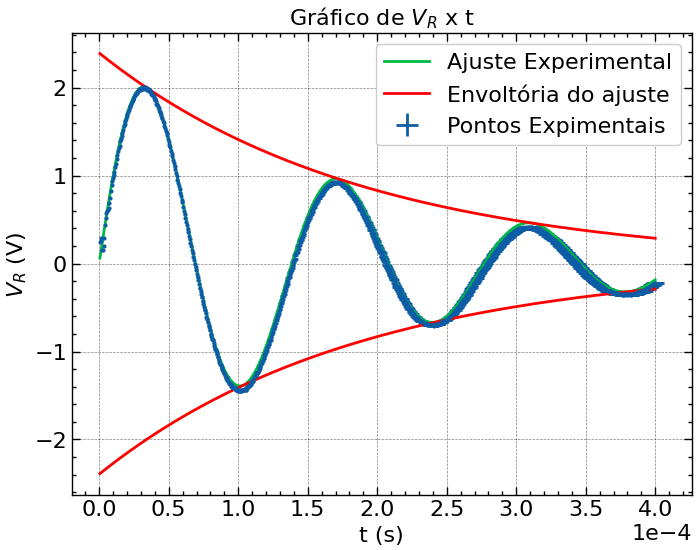

In [148]:
plt.errorbar(x_data, y_data, xerr=x_data_err, yerr= y_data_err, marker = 'o',ms = 2, ls = '', label = 'Pontos Expimentais')
plt.plot(x_data_t, func(x_data_t,*popt),  label = 'Ajuste Experimental') 
plt.plot(x_data, np.abs(A)*np.exp(-gamma/2 *x_data), color = 'red', label = 'Envoltória do ajuste')
plt.plot(x_data, -np.abs(A)*np.exp(-gamma/2 *x_data), color = 'red')

plt.xlabel(r"t (s)")
plt.ylabel(r"$V_R$ (V)")

plt.title(r"Gráfico de $V_R$ x t")
plt.legend()


plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))